In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [45]:
import numpy as np

In [46]:
cardio_data_df = pd.read_csv('Resources/CVD_cleaned.csv')
cardio_data_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [47]:
# Create index
cardio_data_df.reset_index(inplace=True)
cardio_data_df.head()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


## Data Cleaning/prep (Paul)

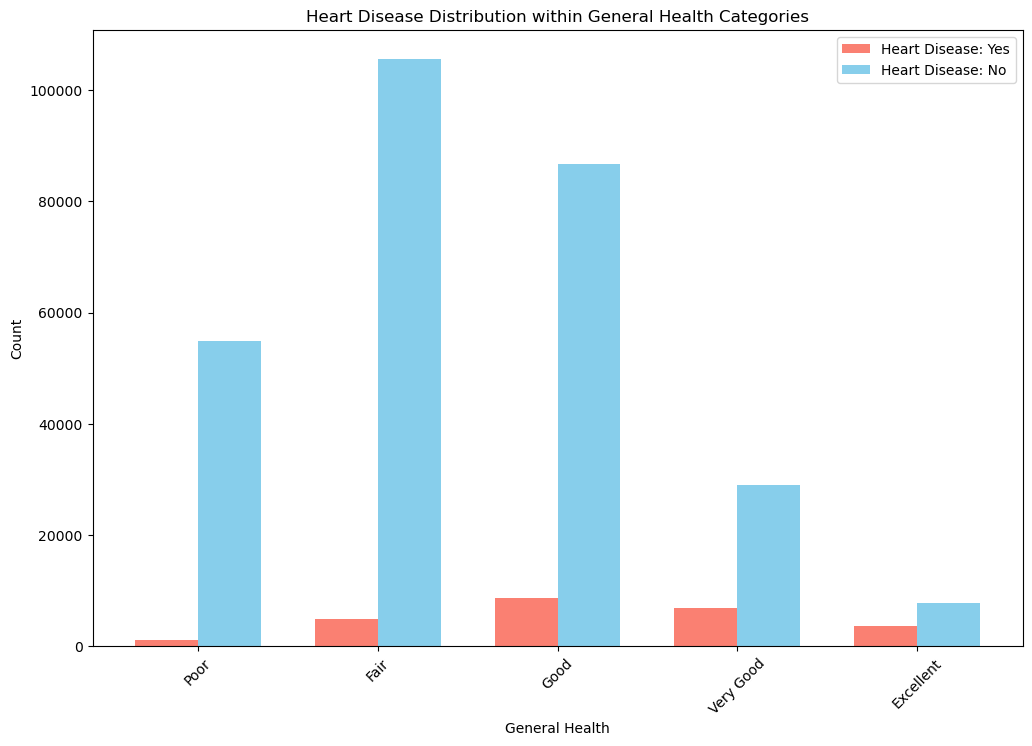

In [48]:
# Define the mappings
health_mapping = {
    'Excellent': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['General_Health'] = cardio_data_df['General_Health'].replace(health_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Define the desired order for General_Health for plotting
health_order = [4, 3, 2, 1, 0]

# Convert the column to categorical with the specified order
cardio_data_df['General_Health'] = pd.Categorical(cardio_data_df['General_Health'], categories=health_order, ordered=True)

# Count occurrences
counts = pd.crosstab(cardio_data_df['General_Health'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('General Health')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution within General Health Categories')
ax.set_xticks(index)
ax.set_xticklabels([k for k, v in sorted(health_mapping.items(), key=lambda item: item[1])], rotation=45)
ax.legend()

# Display the plot
plt.show()

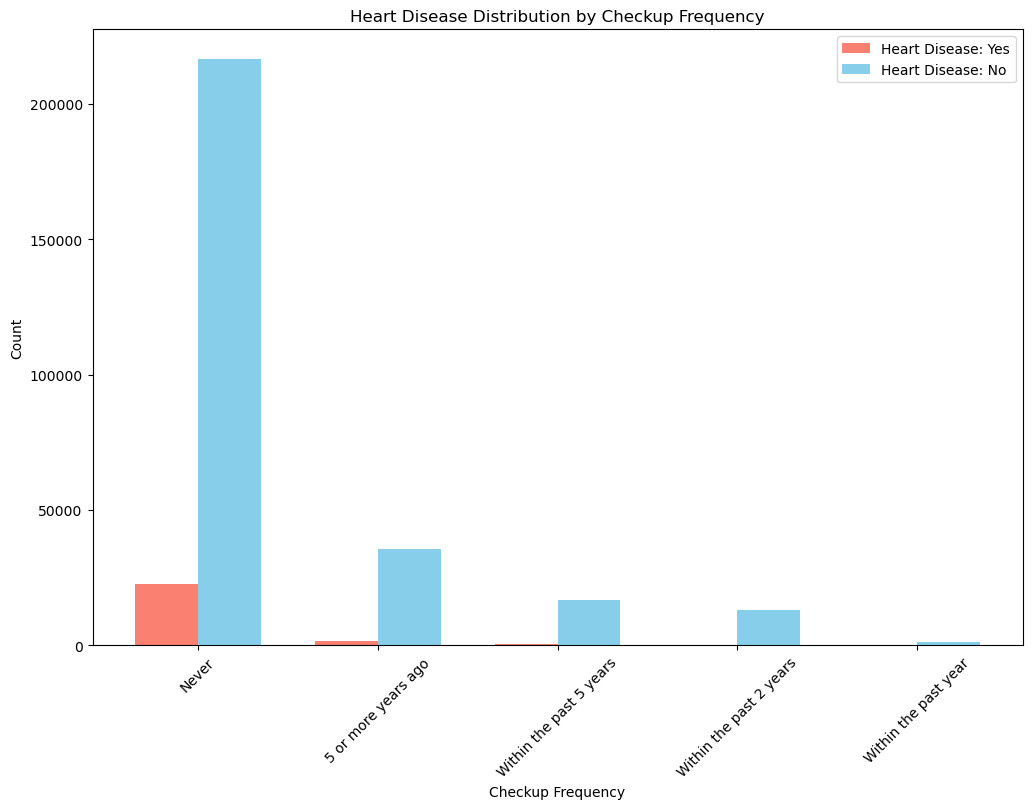

In [49]:
# Define the mappings
checkup_mapping = {
    'Within the past year': 4,
    'Within the past 2 years': 3,
    'Within the past 5 years': 2,
    '5 or more years ago': 1,
    'Never': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['Checkup'] = cardio_data_df['Checkup'].replace(checkup_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Define the desired order for Checkup for plotting
checkup_order = [4, 3, 2, 1, 0]

# Convert the column to categorical with the specified order
cardio_data_df['Checkup'] = pd.Categorical(cardio_data_df['Checkup'], categories=checkup_order, ordered=True)

# Count occurrences
counts = pd.crosstab(cardio_data_df['Checkup'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('Checkup Frequency')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution by Checkup Frequency')
ax.set_xticks(index)
ax.set_xticklabels([k for k, v in sorted(checkup_mapping.items(), key=lambda item: item[1])], rotation=45)
ax.legend()

# Display the plot
plt.show()

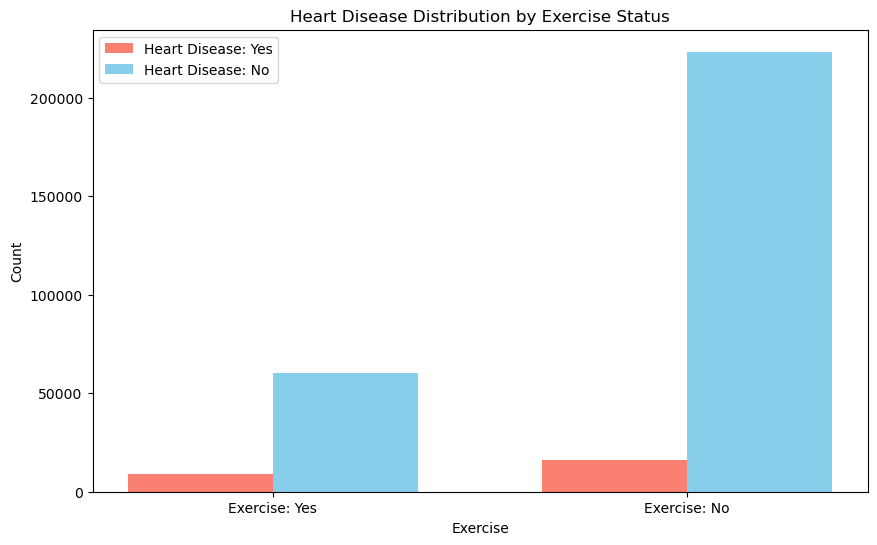

In [50]:
# Define the mappings
exercise_mapping = {
    'Yes': 1,
    'No': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['Exercise'] = cardio_data_df['Exercise'].replace(exercise_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Count occurrences
counts = pd.crosstab(cardio_data_df['Exercise'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('Exercise')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution by Exercise Status')
ax.set_xticks(index)
ax.set_xticklabels(['Exercise: Yes', 'Exercise: No'])
ax.legend()

# Display the plot
plt.show()

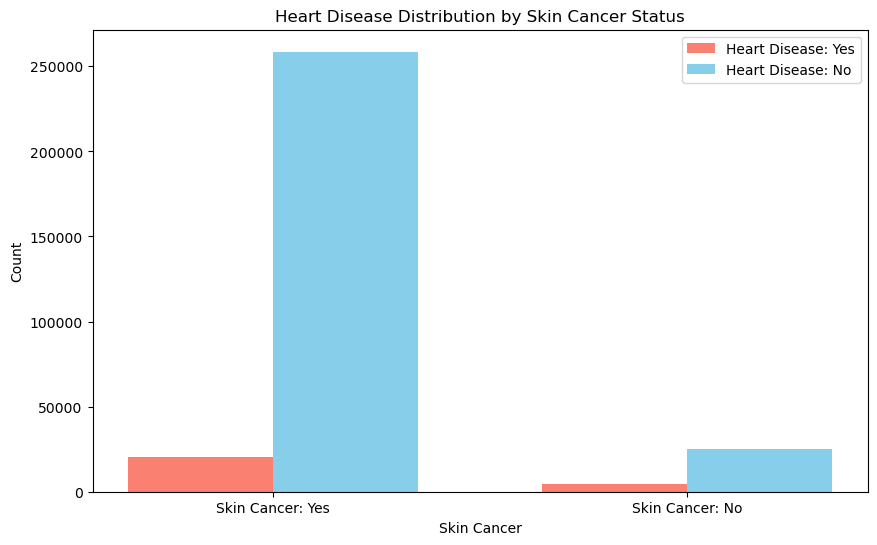

In [51]:
# Define the mappings
skin_cancer_mapping = {
    'Yes': 1,
    'No': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['Skin_Cancer'] = cardio_data_df['Skin_Cancer'].replace(skin_cancer_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Count occurrences
counts = pd.crosstab(cardio_data_df['Skin_Cancer'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('Skin Cancer')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution by Skin Cancer Status')
ax.set_xticks(index)
ax.set_xticklabels(['Skin Cancer: Yes', 'Skin Cancer: No'])
ax.legend()

# Display the plot
plt.show()

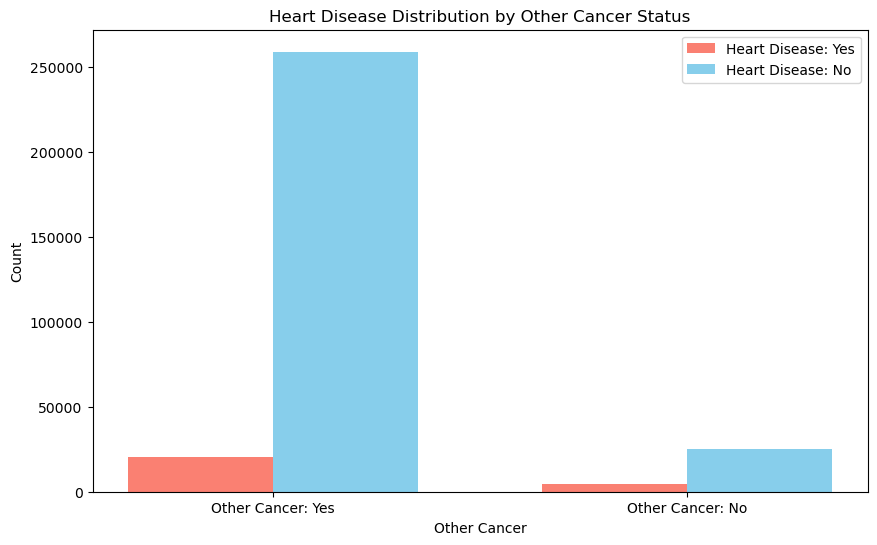

In [52]:
# Define the mappings
other_cancer_mapping = {
    'Yes': 1,
    'No': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['Other_Cancer'] = cardio_data_df['Other_Cancer'].replace(other_cancer_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Count occurrences
counts = pd.crosstab(cardio_data_df['Other_Cancer'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('Other Cancer')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution by Other Cancer Status')
ax.set_xticks(index)
ax.set_xticklabels(['Other Cancer: Yes', 'Other Cancer: No'])
ax.legend()

# Display the plot
plt.show()

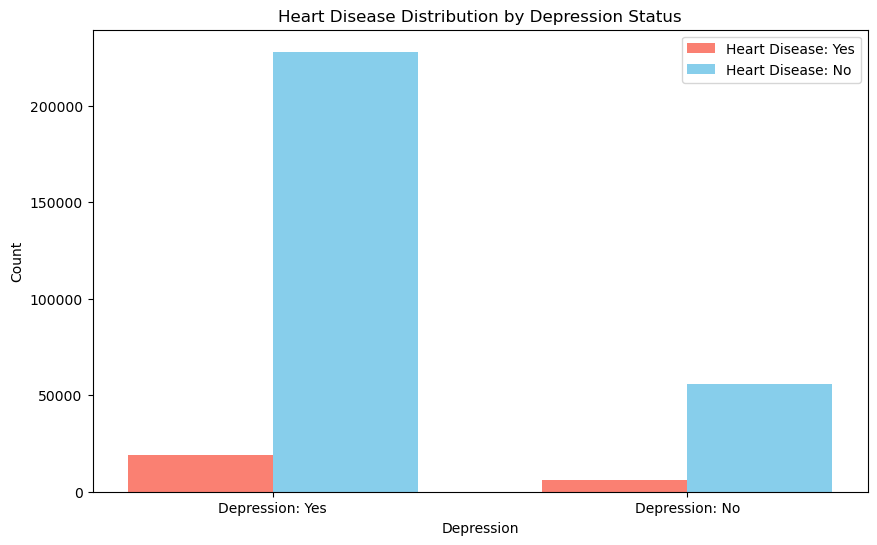

In [53]:
# Define the mappings
depression_mapping = {
    'Yes': 1,
    'No': 0
}

disease_mapping = {
    'Yes': 1,
    'No': 0
}

# Apply the mappings
cardio_data_df['Depression'] = cardio_data_df['Depression'].replace(depression_mapping)
cardio_data_df['Heart_Disease'] = cardio_data_df['Heart_Disease'].replace(disease_mapping)

# Count occurrences
counts = pd.crosstab(cardio_data_df['Depression'], cardio_data_df['Heart_Disease'])

# Number of categories
n = len(counts.index)

# Bar width
bar_width = 0.35

# Positions of the bars
index = np.arange(n)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for Heart Disease = 1 (Yes)
bars_yes = ax.bar(index - bar_width/2, counts[1], bar_width, label='Heart Disease: Yes', color='salmon')

# Plotting the bars for Heart Disease = 0 (No)
bars_no = ax.bar(index + bar_width/2, counts[0], bar_width, label='Heart Disease: No', color='skyblue')

# Adding labels and title
ax.set_xlabel('Depression')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Distribution by Depression Status')
ax.set_xticks(index)
ax.set_xticklabels(['Depression: Yes', 'Depression: No'])
ax.legend()

# Display the plot
plt.show()

Columns available: Index(['No', 'Yes'], dtype='object', name='Diabetes')


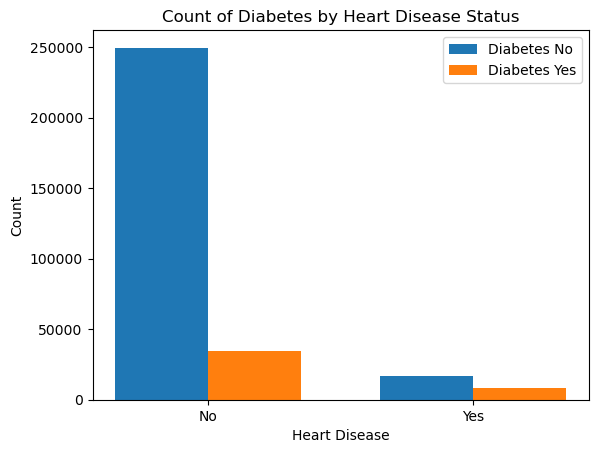

In [54]:
# Map the 'Diabetes' categories
diabetes_mapping = {
    'Yes': 'Yes',
    'Yes, but female told only during pregnancy': 'Yes',
    'No': 'No',
    'No, pre-diabetes or borderline diabetes': 'No'
}

cardio_data_df['Diabetes'] = cardio_data_df['Diabetes'].map(diabetes_mapping)

# Convert categorical values to numerical
heart_disease_mapping = {'Yes': 1, 'No': 0}
diabetes_mapping = {'Yes': 1, 'No': 0}

cardio_data_df['Heart_Disease_num'] = cardio_data_df['Heart_Disease'].map(heart_disease_mapping)
cardio_data_df['Diabetes_num'] = cardio_data_df['Diabetes'].map(diabetes_mapping)

# Aggregate counts
aggregated_data = cardio_data_df.groupby(['Heart_Disease', 'Diabetes']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()

# Positions of bars on x-axis
bar_width = 0.35
index = np.arange(len(aggregated_data))

# Plot bars
if 0 in aggregated_data.columns and 1 in aggregated_data.columns:
    bar1 = ax.bar(index - bar_width/2, aggregated_data[0], bar_width, label='Diabetes No')
    bar2 = ax.bar(index + bar_width/2, aggregated_data[1], bar_width, label='Diabetes Yes')
else:
    # If columns are not 0 and 1, adapt this part based on the actual column names
    print("Columns available:", aggregated_data.columns)
    bar1 = ax.bar(index - bar_width/2, aggregated_data[aggregated_data.columns[0]], bar_width, label='Diabetes No')
    bar2 = ax.bar(index + bar_width/2, aggregated_data[aggregated_data.columns[1]], bar_width, label='Diabetes Yes')

# Labeling
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
ax.set_title('Count of Diabetes by Heart Disease Status')
ax.set_xticks(index)
ax.set_xticklabels(['No', 'Yes'])
ax.legend()

plt.show()

## Data Cleaning/prep (andrew)

In [55]:
# columns_andrew = cardio_data_df.columns.to_list()[8:15]

In [56]:
# df = cardio_data_df[columns_andrew]

In [57]:
# missing_values = df.isnull().any()
# print(missing_values)

In [58]:
# has_d = df['Diabetes'].value_counts()
# print(has_d)

In [59]:
#arth_groups = df['Arthritis'].value_counts()
cardio_data_df['Arthritis_Binary'] = np.where(cardio_data_df['Arthritis'] == "Yes", 1, 0)
#print(arth_groups)
cardio_data_df

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_num,Diabetes_num,Arthritis_Binary
0,0,0,3,0,0,0,0,0,No,Yes,...,32.66,14.54,Yes,0,30,16,12,NaN,0,1
1,1,3,4,0,1,0,0,0,Yes,No,...,77.11,28.29,No,0,30,0,4,NaN,1,0
2,2,3,4,1,0,0,0,0,Yes,No,...,88.45,33.47,No,4,12,3,16,NaN,1,0
3,3,0,4,1,1,0,0,0,Yes,No,...,93.44,28.73,No,0,30,30,8,NaN,1,0
4,4,2,4,0,0,0,0,0,No,No,...,88.45,24.37,Yes,0,8,4,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,308849,3,4,1,0,0,0,0,No,No,...,81.65,29.05,No,4,30,8,0,NaN,0,0
308850,308850,1,2,1,0,0,0,0,Yes,No,...,69.85,21.48,No,8,15,60,4,NaN,1,0
308851,308851,3,1,1,0,0,0,1,Yes,No,...,61.23,24.69,Yes,4,40,8,4,NaN,1,0
308852,308852,3,4,1,0,0,0,0,No,No,...,79.38,23.73,No,3,30,12,0,NaN,0,0


In [60]:
# treat patient sex column
cardio_data_df['Sex'] = np.where(cardio_data_df['Sex'] == "Male", 1, 0)

In [61]:
# age_groups = df['Age_Category'].value_counts()
# print(age_groups)

In [62]:
# cardio_data_df[['Age_Category', 'Heart_Disease_Binary']].groupby(['Age_Category']).agg({"Heart_Disease_Binary": ["mean", "count"]})
# cardio_data_df['Heart_Disease_Binary'] = np.where(cardio_data_df['Heart_Disease'] == "Yes", 1, 0)
#cardio_data_df
age_groups = cardio_data_df['Age_Category'].unique().tolist()
for i, age in enumerate(age_groups):
    cardio_data_df.replace(age, i, inplace=True)
# cardio_data_df_cleaned

In [63]:
#df['Height_(cm)'].value_counts()
# df.boxplot(column='Height_(cm)')
# plt.show()
Q1 = cardio_data_df['Height_(cm)'].quantile(0.25)
Q3 = cardio_data_df['Height_(cm)'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
# print(LB, UB)
def outlier_treatment(x):
    if x > UB:
        return UB
    elif x < LB:
        return LB
    else:
        return x

cardio_data_df['Height_(cm)'] = cardio_data_df['Height_(cm)'].apply(outlier_treatment)
print(LB, UB)
print(cardio_data_df['Height_(cm)'].max())
print(cardio_data_df['Height_(cm)'].min())

140.5 200.5
200.5
140.5


In [64]:
# cardio_data_df[['Age_Category', 'Heart_Disease_Binary']].groupby(['Age_Category']).agg({"Heart_Disease_Binary": ["mean", "count"]})
# cardio_data_df['Heart_Disease_Binary'] = np.where(cardio_data_df['Heart_Disease'] == "Yes", 1, 0)
#cardio_data_df

In [65]:
#df['Weight_(kg)'].value_counts()
# df.boxplot(column='Weight_(kg)')
# plt.show()
Q1 = cardio_data_df['Weight_(kg)'].quantile(0.25)
Q3 = cardio_data_df['Weight_(kg)'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['Weight_(kg)'] = cardio_data_df['Weight_(kg)'].apply(outlier_treatment)
print(cardio_data_df['Weight_(kg)'].max())
print(cardio_data_df['Weight_(kg)'].min())

27.225000000000016 136.065
136.065
27.225000000000016


In [66]:
#df['BMI'].value_counts()
# df.boxplot(column='BMI')
# plt.show()
Q1 = cardio_data_df['BMI'].quantile(0.25)
Q3 = cardio_data_df['BMI'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['BMI'] = cardio_data_df['BMI'].apply(outlier_treatment)
print(cardio_data_df['BMI'].max())
print(cardio_data_df['BMI'].min())

12.75 43.31
43.31
12.75


## Data Cleaning/prep (noe)

In [67]:
# Encode smoking history into 1 and 0 values.
def encode_smoking (Smoking_History):
    if Smoking_History == "Yes":
        return 1
    else:
        return 0

cardio_data_df["Smoking_History"] = cardio_data_df["Smoking_History"].apply(encode_smoking)
cardio_data_df.head()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_num,Diabetes_num,Arthritis_Binary
0,0,0,3,0,0,0,0,0,No,Yes,...,32.66,14.54,1,0,30,16,12,NaN,0,1
1,1,3,4,0,1,0,0,0,Yes,No,...,77.11,28.29,0,0,30,0,4,NaN,1,0
2,2,3,4,1,0,0,0,0,Yes,No,...,88.45,33.47,0,4,12,3,16,NaN,1,0
3,3,0,4,1,1,0,0,0,Yes,No,...,93.44,28.73,0,0,30,30,8,NaN,1,0
4,4,2,4,0,0,0,0,0,No,No,...,88.45,24.37,1,0,8,4,0,NaN,0,0


In [68]:
# Perform outlier treatement for alcohol column.
Q1 = cardio_data_df['Alcohol_Consumption'].quantile(0.25)
Q3 = cardio_data_df['Alcohol_Consumption'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['Alcohol_outlier_treated'] = cardio_data_df['Alcohol_Consumption'].apply(outlier_treatment)
print(cardio_data_df['Alcohol_outlier_treated'].min())
print(cardio_data_df['Alcohol_outlier_treated'].max())

-9.0 15.0
0.0
15.0


In [69]:
#Perform outlier treatment for fruit consumption.
Q1 = cardio_data_df['Fruit_Consumption'].quantile(0.25)
Q3 = cardio_data_df['Fruit_Consumption'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['Fruit_outlier_treated'] = cardio_data_df['Fruit_Consumption'].apply(outlier_treatment)
print(cardio_data_df['Fruit_outlier_treated'].min())
print(cardio_data_df['Fruit_outlier_treated'].max())

-15.0 57.0
0.0
57.0


In [70]:
#Perform outlier treatment for green veggies consumption.
Q1 = cardio_data_df['Green_Vegetables_Consumption'].quantile(0.25)
Q3 = cardio_data_df['Green_Vegetables_Consumption'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['Green_Vegetables_outlier_treated'] = cardio_data_df['Green_Vegetables_Consumption'].apply(outlier_treatment)
print(cardio_data_df['Green_Vegetables_outlier_treated'].min())
print(cardio_data_df['Green_Vegetables_outlier_treated'].max())

-20.0 44.0
0.0
44.0


In [71]:
Q1 = cardio_data_df['FriedPotato_Consumption'].quantile(0.25)
Q3 = cardio_data_df['FriedPotato_Consumption'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(LB, UB)
cardio_data_df['FriedPotato_outlier_treated'] = cardio_data_df['FriedPotato_Consumption'].apply(outlier_treatment)
print(cardio_data_df['FriedPotato_outlier_treated'].min())
print(cardio_data_df['FriedPotato_outlier_treated'].max())

-7.0 17.0
0.0
17.0


In [72]:
cardio_data_df.columns.tolist()

['index',
 'General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Smoking_History',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption',
 'Heart_Disease_num',
 'Diabetes_num',
 'Arthritis_Binary',
 'Alcohol_outlier_treated',
 'Fruit_outlier_treated',
 'Green_Vegetables_outlier_treated',
 'FriedPotato_outlier_treated']

In [73]:
cardio_data_df.head(20)

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_num,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
0,0,0,3,0,0,0,0,0,No,Yes,...,30,16,12,NaN,0,1,0.0,30.0,16.0,12.0
1,1,3,4,0,1,0,0,0,Yes,No,...,30,0,4,NaN,1,0,0.0,30.0,0.0,4.0
2,2,3,4,1,0,0,0,0,Yes,No,...,12,3,16,NaN,1,0,4.0,12.0,3.0,16.0
3,3,0,4,1,1,0,0,0,Yes,No,...,30,30,8,NaN,1,0,0.0,30.0,30.0,8.0
4,4,2,4,0,0,0,0,0,No,No,...,8,4,0,NaN,0,0,0.0,8.0,4.0,0.0
5,5,2,4,0,0,0,0,1,No,Yes,...,12,12,12,NaN,0,1,0.0,12.0,12.0,12.0
6,6,1,4,1,1,0,0,0,No,Yes,...,16,8,0,NaN,0,1,0.0,16.0,8.0,0.0
7,7,2,4,1,0,0,0,0,No,Yes,...,30,8,8,NaN,0,1,3.0,30.0,8.0,8.0
8,8,1,4,0,0,0,0,1,No,No,...,12,12,4,NaN,0,0,0.0,12.0,12.0,4.0
9,9,1,4,0,0,0,0,0,Yes,Yes,...,12,12,1,NaN,1,1,0.0,12.0,12.0,1.0


In [74]:
cardio_data_df_cleaned = cardio_data_df.drop(columns=['Diabetes', 'Arthritis', 'Heart_Disease_num', 'Alcohol_Consumption', \
                                                      'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'])
cardio_data_df_cleaned

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
0,0,0,3,0,0,0,0,0,0,0,150.0,32.66,14.54,1,0,1,0.0,30.0,16.0,12.0
1,1,3,4,0,1,0,0,0,0,0,165.0,77.11,28.29,0,1,0,0.0,30.0,0.0,4.0
2,2,3,4,1,0,0,0,0,0,1,163.0,88.45,33.47,0,1,0,4.0,12.0,3.0,16.0
3,3,0,4,1,1,0,0,0,1,2,180.0,93.44,28.73,0,1,0,0.0,30.0,30.0,8.0
4,4,2,4,0,0,0,0,0,1,3,191.0,88.45,24.37,1,0,0,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,308849,3,4,1,0,0,0,0,1,12,168.0,81.65,29.05,0,0,0,4.0,30.0,8.0,0.0
308850,308850,1,2,1,0,0,0,0,1,4,180.0,69.85,21.48,0,1,0,8.0,15.0,44.0,4.0
308851,308851,3,1,1,0,0,0,1,0,8,157.0,61.23,24.69,1,1,0,4.0,40.0,8.0,4.0
308852,308852,3,4,1,0,0,0,0,1,4,183.0,79.38,23.73,0,0,0,3.0,30.0,12.0,0.0


In [75]:

#cardio_data_df_cleaned.to_csv('prepped_cardio_data.csv', index=False)


## import supervised learning and visualization dependencies

In [76]:
#import supervised learning dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import seaborn as sns

In [77]:
cardio_data_df_cleaned['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [78]:
#create a test df with equal number of positive and negative diagnosis
test_df = cardio_data_df_cleaned.copy()
test1_df = test_df[test_df['Heart_Disease']==1]
test_df = test_df[test_df['Heart_Disease']==0]
test_df = test_df.sample(n=24971)
test_df = pd.concat([test_df, test1_df]).sample(frac=1)
test_df

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
224328,224328,1,3,1,1,0,0,0,1,3,178.0,92.99,29.41,1,1,1,0.0,12.0,0.0,0.0
163433,163433,3,4,1,0,0,0,0,0,7,165.0,90.72,33.28,1,0,0,0.0,57.0,12.0,8.0
148032,148032,2,4,0,1,0,0,0,1,3,183.0,90.72,27.12,1,0,0,0.0,8.0,4.0,6.0
206759,206759,4,4,1,0,0,0,0,0,1,165.0,68.04,24.96,0,0,0,3.0,30.0,30.0,2.0
115815,115815,2,4,0,0,0,0,0,1,2,175.0,90.72,29.53,1,1,0,0.0,57.0,30.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214514,214514,3,4,1,1,0,0,0,1,4,183.0,99.79,29.84,1,0,1,0.0,12.0,8.0,8.0
197602,197602,3,4,1,1,0,0,1,1,2,183.0,117.93,35.26,0,1,1,0.0,30.0,4.0,17.0
282283,282283,3,4,0,0,0,0,0,1,2,178.0,115.21,36.44,1,0,1,0.0,16.0,4.0,8.0
160915,160915,4,4,1,1,0,0,1,1,1,175.0,104.33,33.96,1,1,0,1.0,30.0,4.0,12.0


In [79]:
# Define features set****************
X = test_df.copy()
X.drop(["Heart_Disease", "index"], axis=1, inplace=True)
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
224328,1,3,1,0,0,0,1,3,178.0,92.99,29.41,1,1,1,0.0,12.0,0.0,0.0
163433,3,4,1,0,0,0,0,7,165.0,90.72,33.28,1,0,0,0.0,57.0,12.0,8.0
148032,2,4,0,0,0,0,1,3,183.0,90.72,27.12,1,0,0,0.0,8.0,4.0,6.0
206759,4,4,1,0,0,0,0,1,165.0,68.04,24.96,0,0,0,3.0,30.0,30.0,2.0
115815,2,4,0,0,0,0,1,2,175.0,90.72,29.53,1,1,0,0.0,57.0,30.0,8.0


In [80]:
# Define target vector****************
y = test_df["Heart_Disease"].ravel()
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [81]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [82]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [83]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [84]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit Random Forest Model

In [98]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78, max_depth=5)

In [99]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Make Predictions

In [100]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [101]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [102]:
predictions_train = rf_model.predict(X_train_scaled)
# Calculating the confusion matrix
cm_train = confusion_matrix(y_train, predictions_train)
cm_train_df = pd.DataFrame(
    cm_train, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, predictions_train)

In [103]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4371,1874
Actual 1,1161,5080


Accuracy Score : 0.756927759090181
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6245
           1       0.73      0.81      0.77      6241

    accuracy                           0.76     12486
   macro avg       0.76      0.76      0.76     12486
weighted avg       0.76      0.76      0.76     12486



In [104]:
# Displaying results
print("Confusion Matrix")
display(cm_train_df)
print(f"Accuracy Score : {acc_score_train}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,12917,5809
Actual 1,3577,15153


Accuracy Score : 0.7494126441691584
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.69      0.73     18726
           1       0.72      0.81      0.76     18730

    accuracy                           0.75     37456
   macro avg       0.75      0.75      0.75     37456
weighted avg       0.75      0.75      0.75     37456



## Feature Importance

In [105]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.36100524473305057, 'Age_Category'),
 (0.26632751087471973, 'General_Health'),
 (0.10672626627998309, 'Diabetes_num'),
 (0.08884792825739408, 'Arthritis_Binary'),
 (0.04504063583390722, 'Smoking_History'),
 (0.03248639006512943, 'Sex'),
 (0.028060439083177444, 'Checkup'),
 (0.01557729937418073, 'Skin_Cancer'),
 (0.015495853538737675, 'Exercise'),
 (0.010599874742490672, 'Alcohol_outlier_treated'),
 (0.007855522045243736, 'Other_Cancer'),
 (0.006143677142573551, 'Height_(cm)'),
 (0.004970034574824204, 'BMI'),
 (0.004338572005158739, 'Weight_(kg)'),
 (0.003960654915701541, 'Depression'),
 (0.0011303384361768573, 'FriedPotato_outlier_treated'),
 (0.0007534683509992139, 'Green_Vegetables_outlier_treated'),
 (0.0006802897465515109, 'Fruit_outlier_treated')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

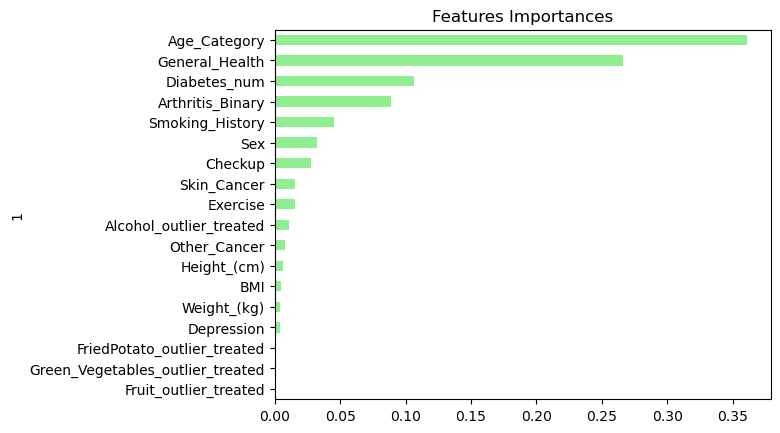

In [106]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [107]:
import pickle

In [109]:
with open ("cardio_rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

## Visualize Results of Model Using Seaborne